In [1]:
!pip install yfinance
!pip install pandas-datareader

In [2]:
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override()
sec = pdr.get_data_yahoo('005930.KS',start='2018-05-04')
msft = pdr.get_data_yahoo('MSFT', start='2018-05-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
sec.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-04,53000.0,53900.0,51800.0,51900.0,50660.105469,39565391
2018-05-08,52600.0,53200.0,51900.0,52600.0,51343.382812,23104720
2018-05-09,52600.0,52800.0,50900.0,50900.0,49683.992188,16128305
2018-05-10,51700.0,51700.0,50600.0,51600.0,50367.269531,13905263
2018-05-11,52000.0,52200.0,51200.0,51300.0,50074.437500,10314997


In [ ]:
msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-04,93.320000,95.370003,92.919998,95.160004,91.639946,22531300
2018-05-07,95.169998,96.709999,95.099998,96.220001,92.660728,24242000
2018-05-08,95.849998,96.160004,95.059998,95.809998,92.265900,23484600
2018-05-09,96.010002,96.970001,95.050003,96.940002,93.354095,27327400
2018-05-10,97.459999,97.949997,97.050003,97.910004,94.288223,22388100


In [ ]:
tmp_msft = msft.drop(columns='Volume')

In [ ]:
tmp_msft.tail()

,Open,High,Low,Close,Adj Close
Date,,,,,
2021-01-04,222.529999,223.000000,214.809998,217.690002,217.690002
2021-01-05,217.259995,218.520004,215.699997,217.899994,217.899994
2021-01-06,212.169998,216.490005,211.940002,212.250000,212.250000
2021-01-07,214.039993,219.339996,213.710007,218.289993,218.289993
2021-01-08,218.679993,220.580002,217.029999,219.619995,219.619995


In [ ]:
sec.index


DatetimeIndex(['2018-05-04', '2018-05-08', '2018-05-09', '2018-05-10',
               '2018-05-11', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18',
               ...
               '2020-12-23', '2020-12-24', '2020-12-28', '2020-12-29',
               '2020-12-30', '2021-01-04', '2021-01-05', '2021-01-06',
               '2021-01-07', '2021-01-08'],
              dtype='datetime64[ns]', name='Date', length=657, freq=None)

In [ ]:
sec.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
yf.pdr_override()

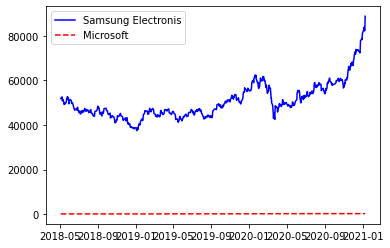

In [ ]:
import matplotlib.pyplot as plt
plt.plot(sec.index,sec.Close,'b', label = 'Samsung Electronis')
plt.plot(msft.index,msft.Close, 'r--', label='Microsoft')
plt.legend(loc='best')
plt.show()

In [ ]:
type(sec['Close'])

pandas.core.series.Series

In [ ]:
sec['Close'].shift(1)

Date
2018-05-04        NaN
2018-05-08    51900.0
2018-05-09    52600.0
2018-05-10    50900.0
2018-05-11    51600.0
               ...   
2021-01-04    81000.0
2021-01-05    83000.0
2021-01-06    83900.0
2021-01-07    82200.0
2021-01-08    82900.0
Name: Close, Length: 657, dtype: float64

In [ ]:
sec_dpc =(sec['Close']/sec['Close'].shift(1)-1)*100
sec_dpc

Date
2018-05-04         NaN
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
                ...   
2021-01-04    2.469136
2021-01-05    1.084337
2021-01-06   -2.026222
2021-01-07    0.851582
2021-01-08    7.117008
Name: Close, Length: 657, dtype: float64

In [ ]:
sec_dpc.iloc[0]=0
sec_dpc.head()

Date
2018-05-04    0.000000
2018-05-08    1.348748
2018-05-09   -3.231939
2018-05-10    1.375246
2018-05-11   -0.581395
Name: Close, dtype: float64

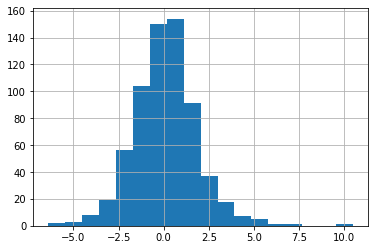

In [ ]:
plt.hist(sec_dpc,bins=18)
plt.grid(True)
plt.show()

In [ ]:
sec_dpc.describe()

count    657.000000
mean       0.097480
std        1.777825
min       -6.387665
25%       -0.992063
50%        0.107181
75%        1.063830
max       10.470588
Name: Close, dtype: float64

In [ ]:
sec_dpc_cs = sec_dpc.cumsum()

In [ ]:
sec_dpc_cs

Date
2018-05-04     0.000000
2018-05-08     1.348748
2018-05-09    -1.883192
2018-05-10    -0.507946
2018-05-11    -1.089341
                ...    
2021-01-04    57.017436
2021-01-05    58.101773
2021-01-06    56.075552
2021-01-07    56.927133
2021-01-08    64.044142
Name: Close, Length: 657, dtype: float64

In [ ]:
msft_dpc = (msft['Close']/msft['Close'].shift(1)-1)*100
msft_dpc.iloc[0]=0
msft_dpc_cs = msft_dpc.cumsum()

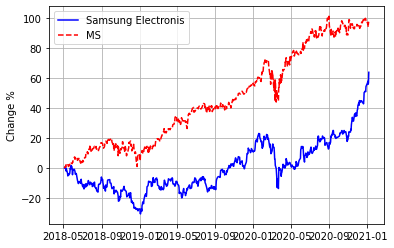

In [ ]:
plt.plot(sec.index,sec_dpc_cs , 'b', label='Samsung Electronis')
plt.plot(msft.index, msft_dpc_cs ,'r--', label='MS')
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [3]:
kospi = pdr.get_data_yahoo('^KS11','2004-01-04')

[*********************100%***********************]  1 of 1 completed


In [ ]:
kospi.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-05,817.280029,825.429993,816.549988,824.099976,824.099976,408200
2004-01-06,831.260010,831.260010,819.530029,823.429993,823.429993,484000
2004-01-07,826.080017,831.070007,825.229980,827.070007,827.070007,404600
2004-01-08,831.099976,839.280029,824.150024,824.150024,824.150024,428800
2004-01-09,835.419983,849.500000,835.049988,845.270020,845.270020,543200


In [ ]:
kospi.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4194.000000,4194.000000,4194.000000,4194.000000,4194.000000,4.194000e+03
mean,1794.189605,1803.618178,1785.972391,1793.432842,1793.432842,7.229229e+05
std,438.516638,438.973511,512.481134,438.401820,438.401820,1.008626e+07
min,719.609985,728.130005,713.989990,719.590027,719.590027,0.000000e+00
25%,1512.704987,1529.395020,1504.462494,1512.797485,1512.797485,3.024500e+05
50%,1933.449951,1940.600037,1920.225037,1931.445007,1931.445007,3.759000e+05
75%,2057.040039,2065.352417,2046.135010,2055.709961,2055.709961,4.757500e+05
max,3040.110107,3161.110107,19025.550781,3152.179932,3152.179932,4.071570e+08


In [ ]:
window=252
peak  = kospi['Adj Close'].rolling(window,min_periods=1).max()
drawdown = kospi['Adj Close']/peak -1.0
max_dd = drawdown.rolling(window,min_periods=1).min()

In [ ]:
peak

Date
2004-01-05     824.099976
2004-01-06     824.099976
2004-01-07     827.070007
2004-01-08     827.070007
2004-01-09     845.270020
                 ...     
2021-01-04    2944.449951
2021-01-05    2990.570068
2021-01-06    2990.570068
2021-01-07    3031.679932
2021-01-08    3152.179932
Name: Adj Close, Length: 4194, dtype: float64

In [ ]:
drawdown

Date
2004-01-05    0.000000
2004-01-06   -0.000813
2004-01-07    0.000000
2004-01-08   -0.003531
2004-01-09    0.000000
                ...   
2021-01-04    0.000000
2021-01-05    0.000000
2021-01-06   -0.007477
2021-01-07    0.000000
2021-01-08    0.000000
Name: Adj Close, Length: 4194, dtype: float64

In [ ]:
max_dd

Date
2004-01-05    0.000000
2004-01-06   -0.000813
2004-01-07   -0.000813
2004-01-08   -0.003531
2004-01-09   -0.003531
                ...   
2021-01-04   -0.357089
2021-01-05   -0.357089
2021-01-06   -0.357089
2021-01-07   -0.357089
2021-01-08   -0.357089
Name: Adj Close, Length: 4194, dtype: float64

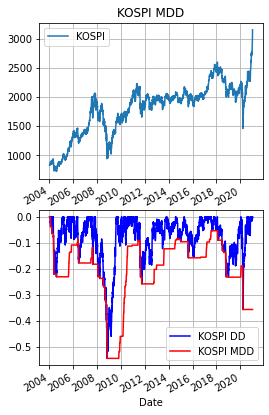

In [ ]:
plt.figure(figsize=(4,7))
plt.subplot(211)
kospi['Close'].plot(label='KOSPI', title= 'KOSPI MDD', grid=True, legend=True)
plt.subplot(212)
drawdown.plot(c='blue',label ='KOSPI DD', grid=True,legend=True)
max_dd.plot(c='red',label='KOSPI MDD',grid=True, legend=True)
plt.show()

In [ ]:
max_dd.min()

-0.5453665130144085

In [ ]:
max_dd[max_dd==-0.5453665130144085]

Date
2008-10-24   -0.545367
2008-10-27   -0.545367
2008-10-28   -0.545367
2008-10-29   -0.545367
2008-10-30   -0.545367
                ...   
2009-10-16   -0.545367
2009-10-19   -0.545367
2009-10-20   -0.545367
2009-10-21   -0.545367
2009-10-22   -0.545367
Name: Adj Close, Length: 252, dtype: float64

In [ ]:
yf.pdr_override()
dow = pdr.get_data_yahoo('^DJI','2000-01-04')
kospi = pdr.get_data_yahoo('^KS11','2000-01-04') 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


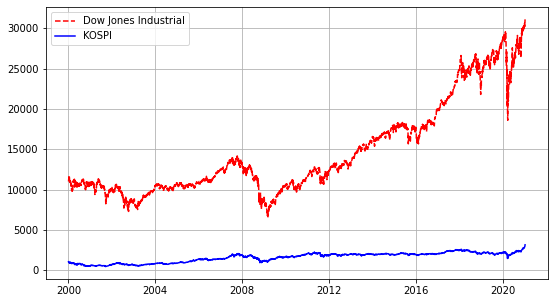

In [ ]:
plt.figure(figsize=(9,5))
plt.plot(dow.index, dow.Close, 'r--',label='Dow Jones Industrial')
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

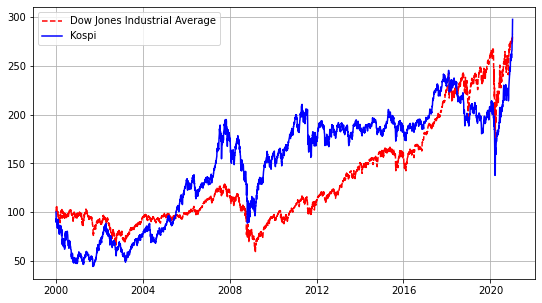

In [ ]:
d = (dow.Close / dow.Close.loc['2000-01-04'])*100
k = (kospi.Close / kospi.Close.loc['2000-01-04'])*100

plt.figure(figsize=(9,5))
plt.plot(d.index,d,'r--', label='Dow Jones Industrial Average')
plt.plot(k.index,k,'b',label='Kospi')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [ ]:
len(dow);len(kospi)

5174

ValueError: ignored

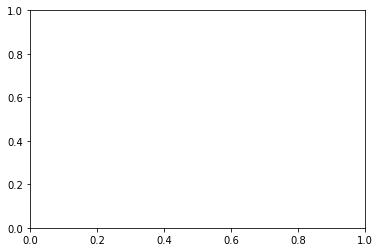

In [ ]:
plt.scatter(dow,kospi,marker='.')

In [ ]:
import pandas as pd
df = pd.DataFrame({'DOW':dow['Close'], 'KOSPI':kospi['Close']})

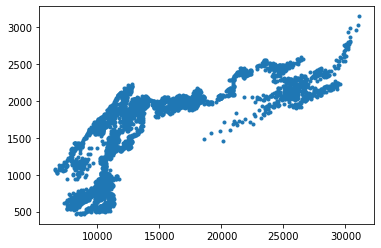

In [ ]:
plt.scatter(df['DOW'], df['KOSPI'], marker='.')

In [ ]:
df.describe()

,DOW,KOSPI
count,5288.000000,5174.000000
mean,14671.774014,1583.664387
std,5811.712059,588.901618
min,6547.049805,468.760010
25%,10456.735107,970.377518
50%,12345.714844,1822.394958
75%,17734.074707,2024.157532
max,31097.970703,3152.179932


In [ ]:
len(df)

5445

In [ ]:
df = df.fillna(method= 'bfill')

In [ ]:
len(df)

5445

In [ ]:
df

,DOW,KOSPI
Date,,
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
2000-01-10,11572.200195,987.239990
...,...,...
2021-01-04,30223.890625,2944.449951
2021-01-05,30391.599609,2990.570068
2021-01-06,30829.400391,2968.209961


In [ ]:
df = df.fillna(method='ffill')

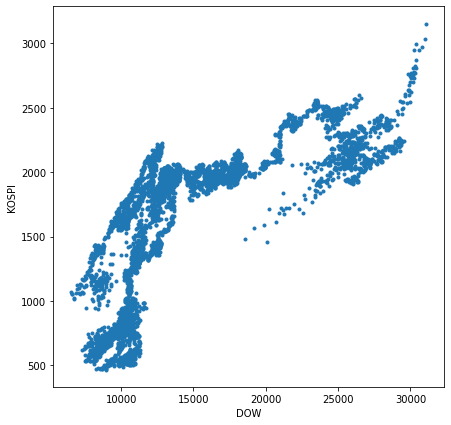

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(df['DOW'],df['KOSPI'], marker='.')
plt.xlabel('DOW')
plt.ylabel('KOSPI')
plt.show()

In [12]:
!pip install scipy

In [ ]:
from scipy import stats
regr = stats.linregress(df['DOW'], df['KOSPI'])
regr

LinregressResult(slope=0.07708435952413942, intercept=454.91121964009653, rvalue=0.7584000488889079, pvalue=0.0, stderr=0.0008979579781926215)

In [ ]:
df.corr()

,DOW,KOSPI
DOW,1.0000,0.7584
KOSPI,0.7584,1.0000


In [ ]:
df['DOW'].corr(df['KOSPI'])

0.7584000488889079

In [ ]:
r_value = df['DOW'].corr(df['KOSPI'])

In [ ]:
r_squared = r_value ** 2

In [ ]:
regr = stats.linregress(df['DOW'],df['KOSPI'])
regr

LinregressResult(slope=0.07708435952413942, intercept=454.91121964009653, rvalue=0.7584000488889079, pvalue=0.0, stderr=0.0008979579781926215)

In [ ]:
regr_line = f'Y={regr.slope:.2f}* X + {regr.intercept:.2f}'

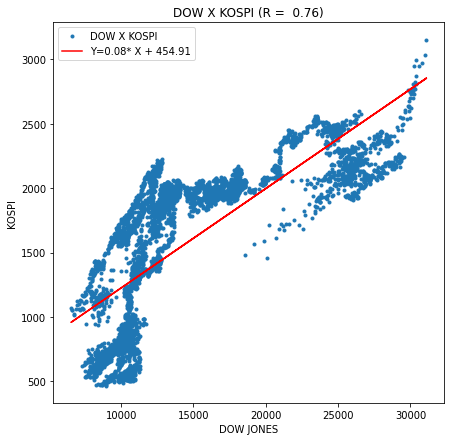

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(df['DOW'],df['KOSPI'],'.')
plt.plot(df['DOW'], regr.slope * df['DOW'] + regr.intercept,'r')
plt.legend(['DOW X KOSPI', regr_line])
plt.title(f'DOW X KOSPI (R = {regr.rvalue : .2f})')
plt.xlabel('DOW JONES')
plt.ylabel('KOSPI')
plt.show()

In [4]:
yf.pdr_override()
tlt = pdr.get_data_yahoo('TLT','2002-07-03')

[*********************100%***********************]  1 of 1 completed


In [5]:
tlt.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-30,81.750000,81.900002,81.519997,81.519997,42.858082,6100
2002-07-31,81.949997,82.800003,81.900002,82.529999,43.389084,29400
2002-08-01,82.540001,83.019997,82.540001,83.000000,43.636154,25000
2002-08-02,83.160004,84.099998,82.879997,83.849998,44.083084,52800
2002-08-05,84.040001,84.440002,83.849998,84.220001,44.277576,61100


In [18]:

df = pd.DataFrame({'TLT':tlt['Close'], 'KOSPI':kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

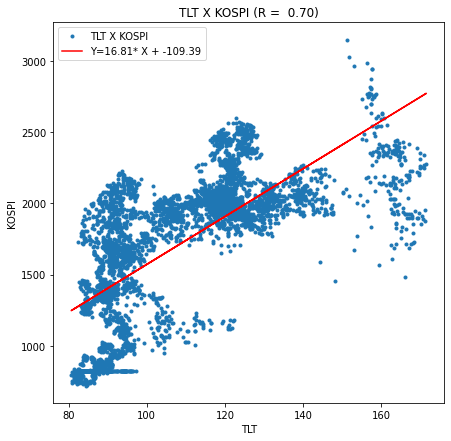

In [19]:

plt.figure(figsize=(7,7))
plt.plot(df['TLT'],df['KOSPI'],'.')

regr = stats.linregress(df['TLT'],df['KOSPI'])
regr_line = f'Y={regr.slope:.2f}* X + {regr.intercept:.2f}'
plt.plot(df['TLT'], regr.slope * df['TLT'] + regr.intercept,'r')
plt.legend(['TLT X KOSPI', regr_line])
plt.title(f'TLT X KOSPI (R = {regr.rvalue : .2f})')
plt.xlabel('TLT')
plt.ylabel('KOSPI')
plt.show()

In [20]:
s1 = pd.Series([+10,-20,+30,-40,+50])
s2= pd.Series([+1,-2,+3,-4,+5])
s3= pd.Series([-10,+20,-30,+40,-50])

df= pd.DataFrame({'S1':s1, 'S2':s2, 'S3':s3})
df

,S1,S2,S3
0,10,1,-10
1,-20,-2,20
2,30,3,-30
3,-40,-4,40
4,50,5,-50


In [21]:
df.corr()

,S1,S2,S3
S1,1.0,1.0,-1.0
S2,1.0,1.0,-1.0
S3,-1.0,-1.0,1.0
